In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('Dataset/dataset.csv')

df.head()

,X,Y,Z,Mixed,ClassLabel
0,0.125022,0.094986,0.001297,0.157018,1
1,0.150710,0.083282,-0.023514,0.173788,1
2,0.102941,0.111084,0.010075,0.151782,1
3,0.038450,0.049911,0.007511,0.063451,1
4,-0.029148,-0.105423,0.017124,0.110711,1


In [2]:
df.shape


(5035, 5)

In [3]:
df.tail()

,X,Y,Z,Mixed,ClassLabel
5030,0.407482,0.448456,-0.038183,0.607134,5
5031,0.309154,0.187775,0.127413,0.383497,5
5032,0.295979,0.128754,0.053413,0.327160,5
5033,0.196186,0.175095,-0.063148,0.270435,5
5034,0.030525,-0.142838,-0.049841,0.154332,5


<Axes: xlabel='ClassLabel', ylabel='count'>

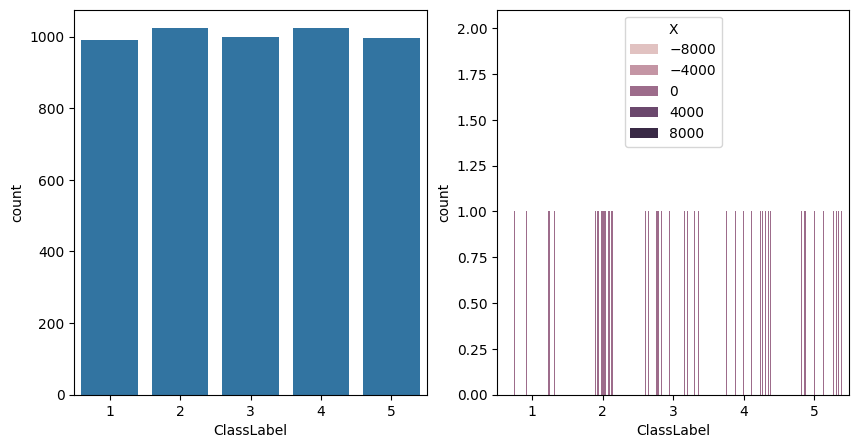

In [4]:
plt.figure(figsize =[10,5])
plt.subplot(121)
sns.countplot(x='ClassLabel',data =df)
plt.subplot(122)
sns.countplot(x='ClassLabel', hue = 'X',data =df)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

extracted_features = pd.read_csv('Dataset/ExtractedFeatures.csv')

# Separate features (X) and target variable (y)
X = extracted_features.drop(columns=['ClassLabel'])
y = extracted_features['ClassLabel']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Handle infinity and large values by replacing them with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.fillna(X_train.mean(), inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

In [22]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [21]:
y_pred = knn.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"KNN classification accuracy: {accuracy}")

KNN classification accuracy: 0.400397088021178


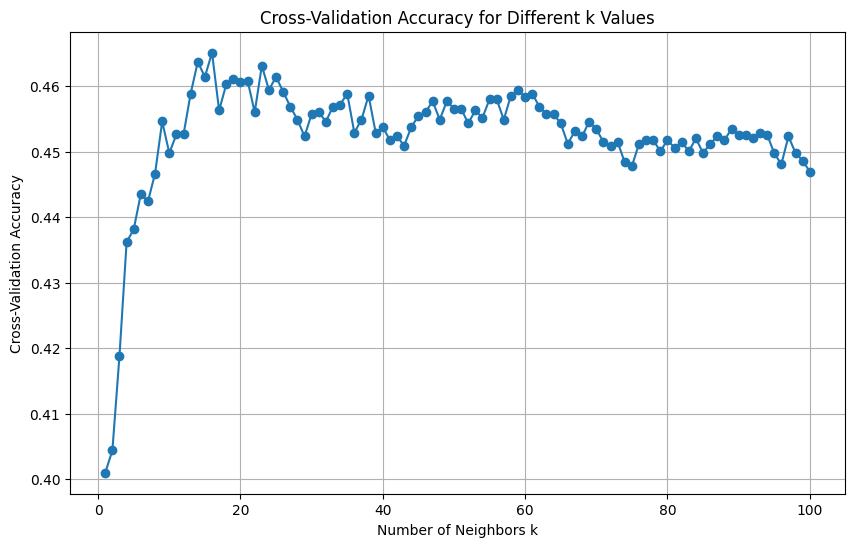

The optimal number of neighbors is 16 with cross-validation accuracy of 0.4651


In [26]:
from sklearn.model_selection import train_test_split, cross_val_score
k_values = range(1, 101)
cross_val_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cross_val_scores.append(scores.mean())

# Plot the cross-validation accuracy against k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, cross_val_scores, marker='o')
plt.title('Cross-Validation Accuracy for Different k Values')
plt.xlabel('Number of Neighbors k')
plt.ylabel('Cross-Validation Accuracy')
plt.grid(True)
plt.show()

# Find and print the optimal k value
optimal_k = k_values[np.argmax(cross_val_scores)]
print(f"The optimal number of neighbors is {optimal_k} with cross-validation accuracy of {max(cross_val_scores):.4f}")
